<a href="https://colab.research.google.com/github/luizevans/luizevans/blob/master/Pandas_Entrada_e_Saida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Criando os Nomes

In [9]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [10]:
# Sortear nomes femininos
nomes_f.sample(7)

,nome,regiao,freq,rank,sexo
54,REGINA,0,252483,55,F
77,MARINA,0,207760,78,F
192,ZILDA,0,82927,193,F
19,MARIANA,0,381778,20,F
27,LUANA,0,354625,28,F
38,JAQUELINE,0,307913,39,F
193,LUCILENE,0,82838,194,F


In [11]:
# Sortear nomes masculinos
nomes_m.sample(7)

,nome,regiao,freq,rank,sexo
83,RENAN,0,170182,84,M
63,MIGUEL,0,239636,64,M
2,ANTONIO,0,2567494,3,M
34,SEBASTIAO,0,461332,35,M
48,RENATO,0,327610,49,M
39,VITOR,0,419585,40,M
169,WELLINGTON,0,76820,170,M


In [12]:
# Contar a qntd de nomes masculinos e femininos
print(f'Quantidades de nomes {len(nomes_f) + len(nomes_m)}')

Quantidades de nomes 400


In [13]:
frames = [nomes_f, nomes_m]

In [14]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [15]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
23,FERNANDO
112,VANDERLEI
154,NICOLE
62,FLAVIA
165,EUNICE


# Inclundo ID dos Alunos

In [16]:
import numpy as np
np.random.seed(123)

In [17]:
total_alunos = len(nomes)
total_alunos

400

In [18]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [19]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [20]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [21]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br


In [22]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [23]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

# Criando a tabela Cursos

In [24]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import html5lib

In [26]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [27]:
type(cursos)

list

In [28]:
cursos = cursos[0]

In [29]:
type(cursos)

pandas.core.frame.DataFrame

In [30]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Alterando o Index de Cursos

In [31]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [32]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [33]:
total_curso = len(cursos)
total_curso

20

In [34]:
cursos["id"] = cursos.index - 1

In [35]:
cursos

,nome_do_curso,id
0,Lógica de programação,-1
1,Java para Web,0
2,C# para Web,1
3,Ruby on Rails,2
4,Cursos de Python,3
5,PHP com MySql,4
6,.NET para web,5
7,Novas integrações com Java,6
8,TDD com Java,7
9,Código limpo com C#,8


In [36]:
# Como setar um novo index
cursos = cursos.set_index('id')

In [37]:
cursos.head(10)

,nome_do_curso
id,
-1,Lógica de programação
0,Java para Web
1,C# para Web
2,Ruby on Rails
3,Cursos de Python
4,PHP com MySql
5,.NET para web
6,Novas integrações com Java
7,TDD com Java


# Matriculando os alunos nos cursos

In [38]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


In [39]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [40]:
nomes.sample(10)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2
88,GILMAR,142,@servicodoemail.com,gilmar@servicodoemail.com,4
183,MARLON,74,@servicodoemail.com,marlon@servicodoemail.com,3
17,FELIPE,113,@servicodoemail.com,felipe@servicodoemail.com,2
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
115,TALITA,94,@dominiodoemail.com.br,talita@dominiodoemail.com.br,2


In [41]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [42]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


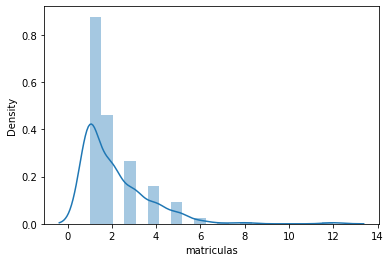

In [43]:
sns.distplot(nomes.matriculas)

In [44]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

In [45]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br,1
41,CLAUDIO,204,@servicodoemail.com,claudio@servicodoemail.com,1


# Selecionando cursos

In [46]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,2
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,4
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,5


In [47]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [48]:
from pandas._libs.algos import take_2d_axis0_object_object
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [49]:
matriculas.head()

,id_aluno,id_curso
0,235,4
1,43,14
2,304,4
3,304,9
4,304,10


In [50]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
-1,58,Lógica de programação
0,31,Java para Web
1,53,C# para Web
2,4,Ruby on Rails
3,12,Cursos de Python
4,74,PHP com MySql
5,32,.NET para web
6,18,Novas integrações com Java
7,59,TDD com Java


In [51]:
matriculas_por_cursos = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [52]:
matriculas_por_cursos

,quantidade_de_alunos,nome_do_curso
id_curso,,
-1,58,Lógica de programação
0,31,Java para Web
1,53,C# para Web
2,4,Ruby on Rails
3,12,Cursos de Python
4,74,PHP com MySql
5,32,.NET para web
6,18,Novas integrações com Java
7,59,TDD com Java


# Saída em diferentes formatos

In [53]:
matriculas_por_cursos.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
-1,58,Lógica de programação
0,31,Java para Web
1,53,C# para Web


In [54]:
matriculas_por_cursos.to_csv('Matriculas_Por_Cursos.csv', index = False)

In [55]:
pd.read_csv('Matriculas_Por_Cursos.csv')

,quantidade_de_alunos,nome_do_curso
0,58,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,74,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java
9,39,Código limpo com C#


In [56]:
matriculas_json = matriculas_por_cursos.to_json()

In [57]:
matriculas_json

'{"quantidade_de_alunos":{"-1":58,"0":31,"1":53,"2":4,"3":12,"4":74,"5":32,"6":18,"7":59,"8":39,"9":61,"10":65,"11":14,"12":27,"13":46,"14":43,"15":56,"16":53,"17":74,"18":35},"nome_do_curso":{"-1":"L\\u00f3gica de programa\\u00e7\\u00e3o","0":"Java para Web","1":"C# para Web","2":"Ruby on Rails","3":"Cursos de Python","4":"PHP com MySql","5":".NET para web","6":"Novas integra\\u00e7\\u00f5es com Java","7":"TDD com Java","8":"C\\u00f3digo limpo com C#","9":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","10":"Hardware b\\u00e1sico","11":"Persist\\u00eancia com .NET","12":"Desenvolvendo jogos","13":"An\\u00e1lise de dados","14":"Estat\\u00edstica b\\u00e1sica","15":"Internet das coisas","16":"Programa\\u00e7\\u00e3o funcional","17":"Boas pr\\u00e1ticas em Java","18":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [58]:
matriculas_html = matriculas_por_cursos.to_html()


In [59]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>-1</th>
      <td>58</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>0</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>1</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>3</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>4</th>
      <td>74</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>5</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>6</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>7</th>
      <td>59</td>


# Criando o banco SQL

In [60]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from sqlalchemy import create_engine, MetaData, Table

In [62]:
engine = create_engine('sqlite:///:memory:')

In [63]:
engine

Engine(sqlite:///:memory:)

In [64]:
type(engine)

sqlalchemy.engine.base.Engine

In [67]:
matriculas_por_cursos.to_sql('matriculas', engine)

In [68]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do banco SQL

In [69]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [70]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,4,Ruby on Rails
1,3,12,Cursos de Python
2,6,18,Novas integrações com Java
3,11,14,Persistência com .NET


In [71]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,58
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,74
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,39


In [72]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [74]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,74
18,Boas práticas em Java,74


# Escrevendo no banco

In [75]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [79]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [80]:
matriculas_por_cursos.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
-1,58,Lógica de programação
0,31,Java para Web
1,53,C# para Web
2,4,Ruby on Rails
3,12,Cursos de Python


In [81]:
id_curso = 3
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
20,92,3
79,192,3
175,203,3
207,213,3
300,36,3
309,23,3
348,157,3
496,336,3
578,355,3
586,307,3


In [86]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
142,HUGO,378,@servicodoemail.com,hugo@servicodoemail.com,1
150,EDMILSON,326,@dominiodoemail.com.br,edmilson@dominiodoemail.com.br,1
161,DAMIAO,349,@servicodoemail.com,damiao@servicodoemail.com,4


In [89]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
92        ALINE
192     NATALIA
203     TATIANE
213    ANDRESSA
36       KARINA
23        NEUZA
157       LEILA
336     RICARDO
355        ALAN
307      VALDIR
147    VINICIOS
215      WESLEI
Name: nome, dtype: object

In [90]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
92,ALINE
192,NATALIA
203,TATIANE
213,ANDRESSA
36,KARINA
23,NEUZA
157,LEILA
336,RICARDO
355,ALAN


In [91]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 3, dtype: object

In [92]:
nome_curso = nome_curso.nome_do_curso

In [93]:
nome_curso

'Cursos de Python'

In [94]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
92,ALINE
192,NATALIA
203,TATIANE
213,ANDRESSA
36,KARINA
23,NEUZA
157,LEILA
336,RICARDO
355,ALAN


In [96]:
proxima_turma = proxima_turma.rename(columns = {'nome': f'Alunos do Curso {nome_curso}'})

In [98]:
proxima_turma.sample()

,Alunos do Curso Cursos de Python
id_aluno,
213,ANDRESSA


# Excel

In [102]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')